<a href="https://colab.research.google.com/github/AlexanderSutherland/CS7643_Project/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM-CNN Project
This section will process the raw data into processed data

In [124]:
import math
import time
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import csv
from IPython.display import Image

# Pytorch package
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# # Torchtest package
# import torchtext
# from torchtext.datasets import Multi30k
# from torch.utils.data import DataLoader
# from torchtext.data.utils import get_tokenizer
# from collections import Counter
# from torchtext.vocab import vocab
# from torchtext.utils import download_from_url, extract_archive
# from torch.nn.utils.rnn import pad_sequence





# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cpu


Test


<bound method NDFrame.head of       Adj Close  Adj Close(t-1)  Adj Close(t-2)  Adj Close(t-3)  \
1013  18.454178       18.640673       18.565186       18.729477   
1014  18.947058       18.454178       18.640673       18.565186   
1015  19.071384       18.947058       18.454178       18.640673   
1016  19.009222       19.071384       18.947058       18.454178   
1017  18.778322       19.009222       19.071384       18.947058   
...         ...             ...             ...             ...   
1505  24.869589       24.800749       24.667658       24.562105   
1506  24.809931       24.869589       24.800749       24.667658   
1507  25.085289       24.809931       24.869589       24.800749   
1508  24.842051       25.085289       24.809931       24.869589   
1509  24.451960       24.842051       25.085289       24.809931   

      Adj Close(t-4)  Adj Close(t-5)  Adj Close(t-6)  Adj Close(t-7)  
1013       18.529663       18.467497       18.587387       18.645111  
1014       18.729477  

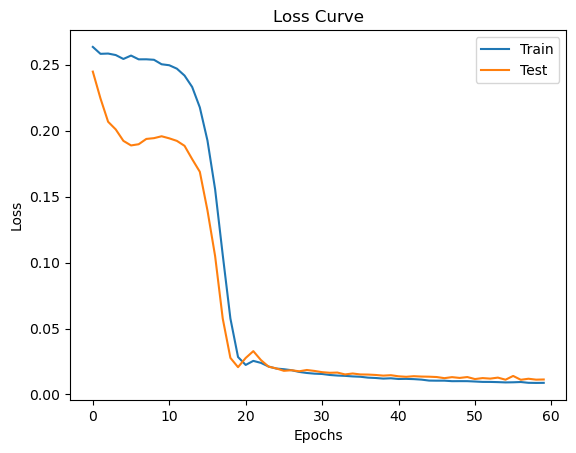

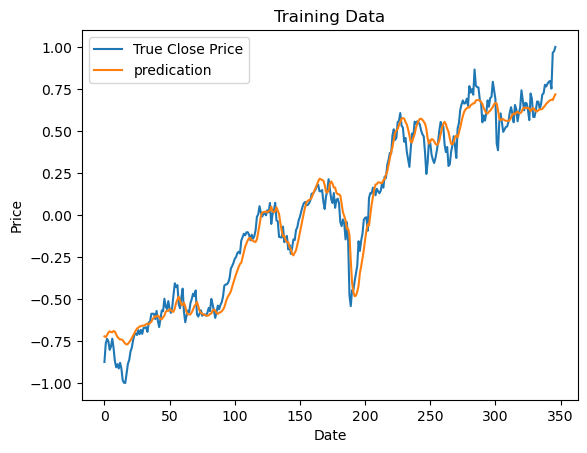

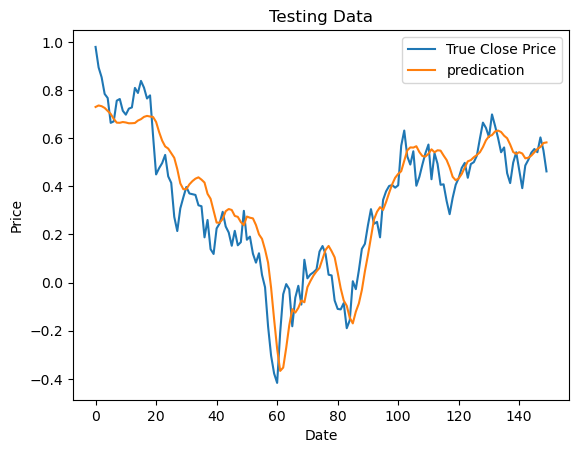

In [145]:
# load data



import sklearn as scikit_learn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from utils import add_previous_dates 
from torch.utils.data import TensorDataset, DataLoader
import train_model as train
import lstm as lstm_model

sd = dt.datetime(2014, 1, 1)
ed = dt.datetime(2015, 12, 31)

def load_data(TBD = None):
    
    df_smh = pd.read_csv("./data/SMH.csv") #, parse_dates =['date'])    
    df_smh["Date"] = pd.to_datetime(df_smh["Date"]) 
    df_smh = df_smh[(df_smh['Date'] >= sd) & (df_smh['Date'] <= ed)]
    
    df_target = df_smh[["Adj Close"]]
    look_back = 7
    
    df_shifted = add_previous_dates(df_target, look_back)   # add price data of seven (lookback) previous day to each entry of the df. Drop the first six entries as they don't have enough previous date data 

    np_shifted = df_shifted.to_numpy()
    
    #scaling df value to be between 01
    scaler = MinMaxScaler(feature_range=(-1, 1))
    np_shifted = scaler.fit_transform(np_shifted)

    split_percent = .7
    x = np_shifted[:, 1:]
    y = np_shifted[:, 0]

    split = int(len(x) * split_percent)

    # reshaping training data to be able to feed into LSTM
    x_train = x[:split].reshape(-1, look_back, 1)
    x_test = x[split:].reshape(-1, look_back, 1)
    y_train = y[:split].reshape(-1, 1)
    y_test = y[split:].reshape(-1, 1)

    x_train = torch.tensor(x_train).float()
    y_train = torch.tensor(y_train).float()
    x_test = torch.tensor(x_test).float()
    y_test = torch.tensor(y_test).float()

    train_dataset = TensorDataset(x_train, y_train)
    test_dataset = TensorDataset(x_test, y_test)
    
    batch_size = 60
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False )

    model = lstm_model.LSTM(1, look_back, 4)

    model = train.train_model(train_loader, 
                              test_loader, 
                              model=model, 
                              model_type=None, 
                              criterion=nn.MSELoss(), 
                              optimizer_type=optim.Adam, 
                              learning_rate=.001, 
                              epochs=60, 
                              load_model=None, 
                              device=device)


    pred = model(x_train).detach().numpy()
    plt.close()
    plt.plot(y_train, label="True Close Price")
    plt.plot(pred, label="predication")
    plt.title("Training Data")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    
    pred = model(x_test).detach().numpy()
    plt.close()
    plt.plot(y_test, label="True Close Price")
    plt.plot(pred, label="predication")
    plt.title("Testing Data")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    #print(x_train.shape,y_train.shape, x_test.shape, y_test.shape )

load_data()

y# **1: Preprocess Data**

In [127]:
# Preprocess data
def preprocess_data(TBD = None):
    pass

# **2: Implement LSTM-CNN Model**

In [128]:
# Create LSTM-RNN PyTorch Class

# **2: Train LSTM-CNN Model**

In [129]:
# Train LSTM-RNN Model Her